In [16]:
# 1. 전처리
# 내 사진들을 학습시킨 (120,180) 의 grayscale 의 학습데이터를 만들어야함
# D:\SPB_DATA\face_data 폴더 안에 Gyujin (1~144) 의 총 145개의 데이터가있음
# 이것을 (145,120,180) 의 grayscale 값을 가지는 것으로 변경해야함.


#1. 데이터 불러오기.
import glob
import sys
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from PIL import Image
from tensorflow import keras

np.random.seed(7)

###################################연습용#######################################
# for i in range(1,145):
#     image_gray = cv2.imread('Gyujin '+'('+str(i)+')''.jpg',cv2.IMREAD_GRAYSCALE)
#     face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#     print(image_gray.shape)
    
#     total_data = image_gray.reshape(144,720,1280)
#################################연습용##########################################

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)
    
   

Python version :  3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
TensorFlow version :  2.2.0
Keras version :  2.3.0-tf


In [17]:
train_files = glob.glob("C:/Users/User/Tensorflow_Folder/test_folder/face_data/train/*.jpg")
test_files = glob.glob("C:/Users/User/Tensorflow_Folder/test_folder/face_data/test/*.jpg")

In [18]:
train_input = []
train_label = []
test_input = []
test_label = []

In [19]:
print(len(train_files))

2600


In [20]:
idx = 0

for i in range(len(train_files)):
    
    if i%13 == 0:
        label = [0 for j in range(int(len(train_files)/13))]
        label[idx] = 1
        idx = idx + 1
        print(idx)
        
        
    img = cv2.imread(train_files[i], cv2.IMREAD_GRAYSCALE)
    crop_img = img.copy()
    crop_img = img[20:400, 150:520]
    resize_img = cv2.resize(crop_img, (92, 112), interpolation=cv2.INTER_AREA)
    if(i>2580):
        cv2.imshow('image', resize_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    train_input.append(resize_img)
    train_label.append(label)
    #cv2.imwrite(train_files[i], resize_img)

train_input = np.array(train_input)
train_label = np.array(train_label)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [21]:
print(train_input[0])
print(train_label[0])
print('train_input shape:', train_input.shape,"/","train_input dtype :", train_input.dtype)
print('train_label shape:', train_label.shape,"/","train_label dtype :", train_label.dtype)
#np.savetxt("C:/Users/user/Desktop/train_label.csv", train_label, delimiter=',')

[[208 210 210 ... 202 202 201]
 [208 207 208 ... 202 202 201]
 [209 208 208 ... 202 201 202]
 ...
 [190 189 188 ...  20  20  24]
 [189 187 186 ...  19  19  19]
 [187 187 187 ...  19  18  18]]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
train_input shape: (2600, 112, 92) / train_input dtype : uint8
train_label shape: (2600, 200) / train_label dtype : int32


In [22]:
idx = 0

for i in range(len(test_files)):
    
    if i%1 == 0:
        label = [0 for j in range(int(len(test_files)/1))]
        label[idx] = 1
        idx = idx + 1
       

    img = cv2.imread(test_files[i], cv2.IMREAD_GRAYSCALE)
    crop_img = img.copy()
    crop_img = img[20:400, 150:520]
    resize_img = cv2.resize(crop_img, (92, 112), interpolation=cv2.INTER_AREA)
    test_input.append(resize_img)
    test_label.append(label)
    #cv2.imwrite(test_files[i], resize_img)
    

test_input = np.array(test_input)
test_label = np.array(test_label)

In [23]:
print(test_input[0])
print(test_label[0])
print('test_input shape:', test_input.shape,"/","test_input dtype :", test_input.dtype)
print('test_label shape:', test_label.shape,"/","test_label dtype :", test_label.dtype)
#np.savetxt("C:/Users/user/Desktop/test_label.csv", test_label, delimiter=',')

[[190 189 190 ... 182 181 181]
 [189 190 190 ... 182 182 182]
 [189 188 188 ... 182 182 182]
 ...
 [166 166 165 ... 144 144 145]
 [165 166 166 ... 143 144 144]
 [166 166 165 ... 143 143 144]]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test_input shape: (200, 112, 92) / test_input dtype : uint8
test_label shape: (200, 200) / test_label dtype : int32


In [24]:
img_rows = 112
img_cols = 92

batch_size = 64
num_classes = 200
epochs = 40

input_shape = (img_rows, img_cols, 1)

In [25]:
train_input = train_input.reshape(train_input.shape[0], img_rows, img_cols, 1)
test_input1 = test_input.reshape(test_input.shape[0], img_rows, img_cols, 1)

train_input = train_input.astype('float32') / 255.
test_input1 = test_input1.astype('float32') / 255.

print('train_input shape:', train_input.shape,"/","train_input dtype :", train_input.dtype)
print('test_input1 shape:', test_input1.shape,"/","test_input1 dtype :", test_input1.dtype)

train_input shape: (2600, 112, 92, 1) / train_input dtype : float32
test_input1 shape: (200, 112, 92, 1) / test_input1 dtype : float32


In [26]:
model = Sequential()
model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 112, 92, 256)      6656      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 46, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 46, 128)       131200    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 23, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 23, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 23, 128)       65664     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 11, 128)      

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
hist = model.fit(train_input, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_input1, test_label))

Epoch 1/40
41/41 [==============================] - 8s 186ms/step - loss: 5.3091 - accuracy: 0.0035 - val_loss: 5.2910 - val_accuracy: 0.0050
Epoch 2/40
41/41 [==============================] - 6s 154ms/step - loss: 5.1371 - accuracy: 0.0196 - val_loss: 4.3144 - val_accuracy: 0.1200
Epoch 3/40
41/41 [==============================] - 7s 173ms/step - loss: 3.7157 - accuracy: 0.1627 - val_loss: 2.1683 - val_accuracy: 0.5150
Epoch 4/40
41/41 [==============================] - 9s 214ms/step - loss: 2.3108 - accuracy: 0.4223 - val_loss: 0.9158 - val_accuracy: 0.8000
Epoch 5/40
41/41 [==============================] - 8s 185ms/step - loss: 1.5327 - accuracy: 0.5919 - val_loss: 0.5631 - val_accuracy: 0.8950
Epoch 6/40
41/41 [==============================] - 8s 206ms/step - loss: 1.1539 - accuracy: 0.6881 - val_loss: 0.3577 - val_accuracy: 0.9350
Epoch 7/40
41/41 [==============================] - 9s 217ms/step - loss: 0.8653 - accuracy: 0.7627 - val_loss: 0.2697 - val_accuracy: 0.9500
Epoch 

In [30]:
model.save('3th_grade_experiment.h5')
model = keras.models.load_model('3th_grade_experiment.h5')

In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [13]:
score = model.evaluate(test_input1, test_label, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.12010584026575089
Test accuracy: 0.9750000238418579


In [21]:
result=model.predict(test_input1)

test_label1 = tf.argmax(test_label,1)
result = tf.argmax(result,1)

In [27]:
num = []

for i in range(200):
    if test_label1[i]!=result[i]:
        num.append(i)

print(num)
print(len(num))

[2, 24, 92, 115, 139]
5


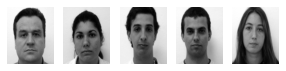

In [28]:
plt.figure(figsize=(20, 20))
for i in range(len(num)):
    plt.subplot(10, 20, i+1)
    plt.imshow(test_input[num[i]], cmap="gray") #plt.imshow의 cmap="gray"는 내부적으로 밝기 조절을 함, 원본보다 밝게 보일 수 있음.
    plt.axis("off")
plt.show()

In [29]:
test_input[num[0]]

array([[182, 182, 182, ..., 175, 175, 174],
       [182, 182, 181, ..., 176, 176, 174],
       [181, 183, 182, ..., 175, 176, 175],
       ...,
       [163, 162, 162, ..., 149, 151, 150],
       [163, 162, 163, ..., 148, 149, 149],
       [164, 164, 163, ..., 146, 145, 148]], dtype=uint8)

In [30]:
test_input[num[0]].shape

(112, 92)